<a href="https://colab.research.google.com/github/pavankalyan369/Yoga-Pose-Detecion-and-Correction-System/blob/main/Yoga_pose_detection_and_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mediapipe
!pip install opencv-python
import cv2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.12.0.88
    Uninstalling opencv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 87.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.


In [ ]:
import os
import sys
root_path='/content/drive/My Drive'
os.chdir(root_path)
sys.path.append('/content/drive/MyDrive/Detect-Yoga-Poses-And-Correction-In-Real-Time-Using-Machine-Learning-Algorithms')


In [ ]:
import csv
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Train and Test angle CSV data reading





In [ ]:
test_angle=pd.read_csv("/content/drive/MyDrive/Detect-Yoga-Poses-And-Correction-In-Real-Time-Using-Machine-Learning-Algorithms/test_angle.csv")
test_angle
train_angle=pd.read_csv("/content/drive/MyDrive/Detect-Yoga-Poses-And-Correction-In-Real-Time-Using-Machine-Learning-Algorithms/train_angle.csv")
train_angle

,left_wrist_angle,right_wrist_angle,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle,left_hip_angle,right_hip_angle,target
0,209.124053,198.305613,190.681518,192.153146,167.552376,188.956532,183.807221,185.887289,279.437132,274.488547,52.635433,126.573031,downdog
1,210.963757,211.429566,197.710743,196.099713,182.366604,171.215813,176.683111,183.438908,273.116613,269.664548,134.554474,41.561092,downdog
2,213.332197,213.164652,181.746842,185.259076,184.486644,173.135858,132.160368,137.164701,265.259950,260.892666,120.798553,56.509221,downdog
3,210.972835,191.259688,189.751718,197.366763,180.097624,177.883081,180.833767,186.685369,230.264198,236.326021,101.416695,72.129963,downdog
4,158.601281,144.855757,170.407834,174.575282,168.859375,190.196421,183.440999,182.825114,85.114460,85.465724,100.919689,77.992224,downdog
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,129.973890,193.730216,123.986167,201.989739,50.666155,62.792578,175.551209,133.269000,175.891292,211.320118,115.071282,151.083391,warrior2
1041,187.594643,177.709390,174.090041,178.054215,89.120914,106.765203,170.593228,95.051145,242.112048,208.770649,123.213111,180.000000,warrior2
1042,191.309932,176.143199,174.289407,185.133884,91.414423,114.095335,173.688394,108.897935,223.894543,212.327514,133.576795,163.231918,warrior2
1043,177.881082,181.647029,179.910110,182.620865,93.111923,107.836581,176.473909,112.292985,207.121971,206.184173,132.767844,169.156931,warrior2


In [ ]:
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

:Training a machine learning model, specifically a Support Vector Classifier

1.   *List item*
2.   List item

(SVC), for a classification task.



In [ ]:


data_train = pd.read_csv("/content/drive/MyDrive/Detect-Yoga-Poses-And-Correction-In-Real-Time-Using-Machine-Learning-Algorithms/train_angle.csv")
data_test = pd.read_csv("/content/drive/MyDrive/Detect-Yoga-Poses-And-Correction-In-Real-Time-Using-Machine-Learning-Algorithms/test_angle.csv")

X, Y = data_train.iloc[:, :data_train.shape[1] - 1], data_train['target']

model = SVC(kernel='rbf', decision_function_shape='ovo',probability=True)
model.fit(X, Y)



SVC(decision_function_shape='ovo', probability=True)

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Separate features (X) and target (Y) from training data
X_train = data_train.iloc[:, :data_train.shape[1] - 1]
Y_train = data_train['target']

# Separate features (X) and target (Y) from testing data
X_test = data_test.iloc[:, :data_test.shape[1] - 1]
Y_test = data_test['target']

# Initialize SVM model
model = SVC(kernel='rbf', decision_function_shape='ovo', probability=True)

# Train the model
model.fit(X_train, Y_train)

# Predict on the test data
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 97.85%


Performing the evaluation of a machine learning model using a test dataset and visualizing the results using a confusion matrix.

In [ ]:
import mediapipe as mp
import cv2
import pandas as pd
import os
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
points = mp_pose.PoseLandmark  # Landmarks
mp_drawing = mp.solutions.drawing_utils # For drawing keypoints


def calculate_angle(landmark1, landmark2, landmark3):
    x1, y1, _ = landmark1.x, landmark1.y, landmark1.z
    x2, y2, _ = landmark2.x, landmark2.y, landmark2.z
    x3, y3, _ = landmark3.x, landmark3.y, landmark3.z

    angle = np.degrees(np.arctan2(y3 - y2, x3 - x2) - np.arctan2(y1 - y2, x1 - x2))

    # Check if the angle is less than zero.
    if angle < 0:
        # Add 360 to the found angle.
        angle += 360

    return angle


def extract_pose_angles(results):
    angles = []

    if results.pose_landmarks is not None:
        landmarks = results.pose_landmarks.landmark
        # Get the angle between the left elbow, wrist and left index points.
        left_wrist_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_INDEX.value])
        angles.append(left_wrist_angle)
        # Get the angle between the right elbow, wrist and left index points.
        right_wrist_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_INDEX.value])
        angles.append(right_wrist_angle)


        # Get the angle between the left shoulder, elbow and wrist points.
        left_elbow_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
        angles.append(left_elbow_angle)
        # Get the angle between the right shoulder, elbow and wrist points.
        right_elbow_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])
        angles.append(right_elbow_angle)
        # Get the angle between the left elbow, shoulder and hip points.
        left_shoulder_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                            landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                            landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
        angles.append(left_shoulder_angle)

        # Get the angle between the right hip, shoulder and elbow points.
        right_shoulder_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                            landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                            landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
        angles.append(right_shoulder_angle)

        # Get the angle between the left hip, knee and ankle points.
        left_knee_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
        angles.append(left_knee_angle)

        # Get the angle between the right hip, knee and ankle points
        right_knee_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
        angles.append(right_knee_angle)

        # Get the angle between the left hip, ankle and LEFT_FOOT_INDEX points.
        left_ankle_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value])
        angles.append(left_ankle_angle)

        # Get the angle between the right hip, ankle and RIGHT_FOOT_INDEX points
        right_ankle_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value])
        angles.append(right_ankle_angle)

        # Get the angle between the left knee, hip and right hip points.
        left_hip_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                        landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value])
        angles.append(left_hip_angle)

        # Get the angle between the left hip, right hip and right kneee points
        right_hip_angle = calculate_angle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                        landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value])
        angles.append(right_hip_angle)
    return angles




In [ ]:
def evaluate(data_test, model, show=False):
        target = data_test.loc[:, "target"]  # list of labels
        target = target.values.tolist()
        predictions = []
        for i in range(len(data_test)):
                tmp = data_test.iloc[i, 0:len(data_test.columns) - 1]
                tmp = tmp.values.tolist()
                predictions.append(model.predict([tmp])[0])
        if show:
                print(confusion_matrix(predictions, target), '\n')
                print(classification_report(predictions, target))
        return predictions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have va

[[ 93   0   0   1   0]
 [  0  75   0   0   0]
 [  1   2 115   1   1]
 [  0   0   0  66   0]
 [  1   3   0   0 106]] 

              precision    recall  f1-score   support

     downdog       0.98      0.99      0.98        94
     goddess       0.94      1.00      0.97        75
       plank       1.00      0.96      0.98       120
        tree       0.97      1.00      0.99        66
    warrior2       0.99      0.96      0.98       110

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465



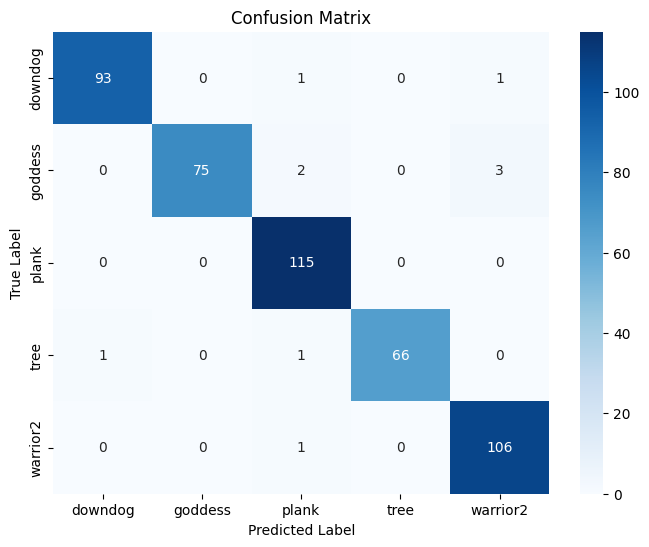

In [ ]:
# Test phase : build test dataset then evaluate
predictions = evaluate(data_test, model, show=True)

#Create a confusion matrix
cm = confusion_matrix(data_test['target'], predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Prediction of image

In [ ]:
# Predict the name of the poses in the image
def predict(img, model, show=False):
        img = cv2.imread(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #Resize the image to 50% of the original size
        scale_factor = 0.5
        img = cv2.resize(img, None, fx=scale_factor, fy=scale_factor)
        results = pose.process(img)

        if results.pose_landmarks:
                list_angles = []
                list_angles = extract_pose_angles(results)
                y = model.predict([list_angles])

                if show:
                        mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
                        cv2.putText(img, str(y[0]), (50,50), cv2.FONT_HERSHEY_SIMPLEX,1,(215,215,0),3)
                        plt.imshow(img) #cv2_imshow("image", img)
                        #cv2.waitKey(0)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


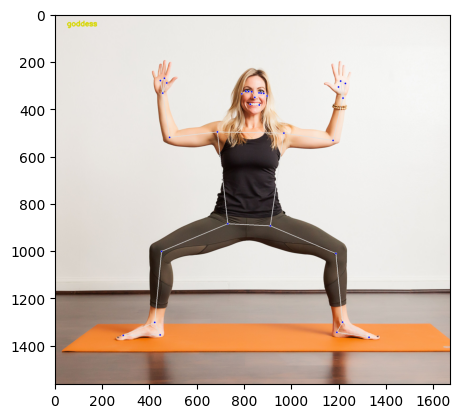

In [ ]:
predict('/content/drive/MyDrive/Detect-Yoga-Poses-And-Correction-In-Real-Time-Using-Machine-Learning-Algorithms/teacher_yoga/goddess.jpeg',model,show=True)

Yoga pose Prediction of the video

In [ ]:
from google.colab.patches import cv2_imshow
import os
from moviepy.editor import ImageSequenceClip
import os
!pip install Pillow
from PIL import Image


def predict_video02(model, video="0", show=False):
    m = 0
    cap = cv2.VideoCapture(video)
    output_folder_path = '/content/drive/My Drive/DETECTION-OUTPUT'  # Define output folder path
    video_name = os.path.splitext(os.path.basename(video))[0]  # Extract video file name without extension
    sc='/'

    # Create a unique folder for each video
    video_folder_path = os.path.join(output_folder_path, video_name)
    if not os.path.exists(video_folder_path):
        os.makedirs(video_folder_path)
    img_dir2 = output_folder_path+sc+video_name
    print(video_folder_path)

    while cap.isOpened():
        angles = []
        success, img = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            break
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = pose.process(img)
        if results.pose_landmarks:
            list_angles = extract_pose_angles(results)
            y = model.predict([list_angles])
            name = str(y[0])
            if show:
                mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
                (w, h), _ = cv2.getTextSize(name, cv2.FONT_HERSHEY_SIMPLEX, 1, 1)
                cv2.rectangle(img, (40, 40), (40+w, 60), (255, 255, 255), cv2.FILLED)
                cv2.putText(img, name, (40, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3)
                # cv2_imshow(img)
                if cv2.waitKey(5) & 0xFF == 27:
                    break
            if m > 0:
                i_formatted = '{:03d}'.format(m)
                img_name1 = f"output_image_{i_formatted}.jpg"
                img_path1 = os.path.join(video_folder_path, img_name1)  # Use video_folder_path
                cv2.imwrite(img_path1, img)
            m = m + 1
            print(m)
            # if m==10:
            #   break

    # folder=folder
    # os.makedirs(video_folder_path, exist_ok=True)
    video_folder_path1 = os.path.dirname(video_folder_path)
    def compute_average_dimensions(video_folder_path1):
        total_width = 0
        total_height = 0
        img_count = 0
        print(video_folder_path1)

        for img_file in os.listdir(video_folder_path1):
            if img_file.endswith((".jpg", ".jpeg", ".png")):

               image = Image.open(os.path.join(video_folder_path1, img_file))
               w, h = image.size
               total_width += w
               total_height += h
               img_count += 1

        avg_width = int(total_width / img_count)
        avg_height = int(total_height / img_count)
        return avg_width, avg_height

    # Calculate average dimensions of images
    avg_width, avg_height = compute_average_dimensions(img_dir2)

    def create_video_from_images(folder, video_filename='video_name.mp4'):
        # Get list of image files in the folder

        valid_images = [i for i in os.listdir(folder) if i.endswith((".jpg", ".jpeg", ".png"))]

        # Sort images based on filename
        valid_images.sort()

        # Create list of image paths
        image_paths = [os.path.join(folder, img_name) for img_name in valid_images]

        # Create video from image sequence
        clip = ImageSequenceClip(image_paths, fps=12)  # Adjust fps as needed

        # Get the first frame
        first_frame = image_paths[0]

        # Duplicate the first frame to match the desired duration
        num_duplicates = max(1, int(clip.fps * (1 - len(image_paths) / clip.fps)))
        image_paths = [first_frame] * num_duplicates + image_paths

        # Create video from image sequence
        clip = ImageSequenceClip(image_paths, fps=12)  # Adjust fps as needed

        # Save the video
        video_path = os.path.join(folder, video_filename)
        clip.write_videofile(video_path, codec='libx264')

        # Print the name of each image appended in the video
        print("Names of images appended in the video:")
        for img_path in image_paths[num_duplicates:]:
            img_name = os.path.basename(img_path)
        return video_path
        # Replace 'img_dir' with the directory containing your images
    video_path = create_video_from_images(img_dir2)



  if event.key is 'enter':



In [ ]:
predict_video02(model,'/content/drive/MyDrive/Detect-Yoga-Poses-And-Correction-In-Real-Time-Using-Machine-Learning-Algorithms/video4.mp4',show=True)


  warnings.warn(

  warnings.warn(



/content/drive/My Drive/DETECTION-OUTPUT/video4
1


  warnings.warn(



2


  warnings.warn(



3


  warnings.warn(



4


  warnings.warn(



5


  warnings.warn(



6


  warnings.warn(



7


  warnings.warn(



8


  warnings.warn(



9


  warnings.warn(



10


  warnings.warn(



11


  warnings.warn(



12


  warnings.warn(



13


  warnings.warn(



14


  warnings.warn(



15


  warnings.warn(



16


  warnings.warn(



17


  warnings.warn(



18


  warnings.warn(



19


  warnings.warn(



20


  warnings.warn(



21


  warnings.warn(



22


  warnings.warn(



23


  warnings.warn(



24


  warnings.warn(



25


  warnings.warn(



26


  warnings.warn(



27


  warnings.warn(



28


  warnings.warn(



29


  warnings.warn(



30


  warnings.warn(



31


  warnings.warn(



32


  warnings.warn(



33


  warnings.warn(



34


  warnings.warn(



35


  warnings.warn(



36


  warnings.warn(



37


  warnings.warn(



38


  warnings.warn(



39


  warnings.warn(



40


  warnings.warn(



41


  warnings.warn(



42


  warnings.warn(



43


  warnings.warn(



44


  warnings.warn(



45


  warnings.warn(



46


  warnings.warn(



47


  warnings.warn(



48


  warnings.warn(



49


  warnings.warn(



50


  warnings.warn(



51


  warnings.warn(



52


  warnings.warn(



53


  warnings.warn(



54


  warnings.warn(



55


  warnings.warn(



56


  warnings.warn(



57


  warnings.warn(



58


  warnings.warn(



59


  warnings.warn(



60


  warnings.warn(



61


  warnings.warn(



62


  warnings.warn(



63


  warnings.warn(



64


  warnings.warn(



65


  warnings.warn(



66


  warnings.warn(



67


  warnings.warn(



68


  warnings.warn(



69


  warnings.warn(



70


  warnings.warn(



71


  warnings.warn(



72


  warnings.warn(



73


  warnings.warn(



74


  warnings.warn(



75


  warnings.warn(



76


  warnings.warn(



77


  warnings.warn(



78


  warnings.warn(



79


  warnings.warn(



80


  warnings.warn(



81


  warnings.warn(



82


  warnings.warn(



83


  warnings.warn(



84


  warnings.warn(



85


  warnings.warn(



86


  warnings.warn(



87


  warnings.warn(



88


  warnings.warn(



89


  warnings.warn(



90


  warnings.warn(



91


  warnings.warn(



92


  warnings.warn(



93


  warnings.warn(



94


  warnings.warn(



95


  warnings.warn(



96


  warnings.warn(



97


  warnings.warn(



98


  warnings.warn(



99


  warnings.warn(



100


  warnings.warn(



101


  warnings.warn(



102


  warnings.warn(



103


  warnings.warn(



104


  warnings.warn(



105


  warnings.warn(



106


  warnings.warn(



107


  warnings.warn(



108


  warnings.warn(



109


  warnings.warn(



110


  warnings.warn(



111


  warnings.warn(



112


  warnings.warn(



113


  warnings.warn(



114


  warnings.warn(



115


  warnings.warn(



116


  warnings.warn(



117


  warnings.warn(



118


  warnings.warn(



119


  warnings.warn(



120


  warnings.warn(



121


  warnings.warn(



122


  warnings.warn(



123


  warnings.warn(



124


  warnings.warn(



125


  warnings.warn(



126


  warnings.warn(



127


  warnings.warn(



128


  warnings.warn(



129


  warnings.warn(



130


  warnings.warn(



131


  warnings.warn(



132


  warnings.warn(



133


  warnings.warn(



134


  warnings.warn(



135


  warnings.warn(



136


  warnings.warn(



137


  warnings.warn(



138


  warnings.warn(



139


  warnings.warn(



140


  warnings.warn(



141


  warnings.warn(



142


  warnings.warn(



143


  warnings.warn(



144


  warnings.warn(



145


  warnings.warn(



146


  warnings.warn(



147


  warnings.warn(



148


  warnings.warn(



149


  warnings.warn(



150


  warnings.warn(



151


  warnings.warn(



152


  warnings.warn(



153


  warnings.warn(



154


  warnings.warn(



155


  warnings.warn(



156


  warnings.warn(



157


  warnings.warn(



158


  warnings.warn(



159


  warnings.warn(



160


  warnings.warn(



161


  warnings.warn(



162


  warnings.warn(



163


  warnings.warn(



164


  warnings.warn(



165


  warnings.warn(



166


  warnings.warn(



167


  warnings.warn(



168


  warnings.warn(



169


  warnings.warn(



170


  warnings.warn(



171


  warnings.warn(



172


  warnings.warn(



173


  warnings.warn(



174


  warnings.warn(



175


  warnings.warn(



176


  warnings.warn(



177


  warnings.warn(



178


  warnings.warn(



179


  warnings.warn(



180


  warnings.warn(



181


  warnings.warn(



182


  warnings.warn(



183


  warnings.warn(



184


  warnings.warn(



185


  warnings.warn(



186


  warnings.warn(



187


  warnings.warn(



188


  warnings.warn(



189


  warnings.warn(



190


  warnings.warn(



191


  warnings.warn(



192


  warnings.warn(



193


  warnings.warn(



194


  warnings.warn(



195


  warnings.warn(



196


  warnings.warn(



197


  warnings.warn(



198


  warnings.warn(



199


  warnings.warn(



200


  warnings.warn(



201


  warnings.warn(



202


  warnings.warn(



203


  warnings.warn(



204


  warnings.warn(



205


  warnings.warn(



206


  warnings.warn(



207


  warnings.warn(



208


  warnings.warn(



209


  warnings.warn(



210


  warnings.warn(



211


  warnings.warn(



212


  warnings.warn(



213


  warnings.warn(



214


  warnings.warn(



215


  warnings.warn(



216


  warnings.warn(



217


  warnings.warn(



218


  warnings.warn(



219


  warnings.warn(



220


  warnings.warn(



221


  warnings.warn(



222


  warnings.warn(



223


  warnings.warn(



224


  warnings.warn(



225


  warnings.warn(



226


  warnings.warn(



227


  warnings.warn(



228


  warnings.warn(



229


  warnings.warn(



230


  warnings.warn(



231


  warnings.warn(



232


  warnings.warn(



233


  warnings.warn(



234


  warnings.warn(



235


  warnings.warn(



236


  warnings.warn(



237


  warnings.warn(



238


  warnings.warn(



239


  warnings.warn(



240


  warnings.warn(



241


  warnings.warn(



242


  warnings.warn(



243


  warnings.warn(



244


  warnings.warn(



245


  warnings.warn(



246


  warnings.warn(



247


  warnings.warn(



248


  warnings.warn(



249


  warnings.warn(



250


  warnings.warn(



251


  warnings.warn(



252


  warnings.warn(



253


  warnings.warn(



254


  warnings.warn(



255


  warnings.warn(



256


  warnings.warn(



257


  warnings.warn(



258


  warnings.warn(



259


  warnings.warn(



260


  warnings.warn(



261
262
Ignoring empty camera frame.
/content/drive/My Drive/DETECTION-OUTPUT/video4
Moviepy - Building video /content/drive/My Drive/DETECTION-OUTPUT/video4/video_name.mp4.
Moviepy - Writing video /content/drive/My Drive/DETECTION-OUTPUT/video4/video_name.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/DETECTION-OUTPUT/video4/video_name.mp4
Names of images appended in the video:


Yoga Pose Correction of the image


In [ ]:


import cv2
import mediapipe as mp
import numpy as np
import csv
import os

# Create a pose instance
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def calculate_angle(landmark1, landmark2, landmark3, select=1):
    angle=None
    if select == '1':
        x1, y1, _ = landmark1.x, landmark1.y, landmark1.z
        x2, y2, _ = landmark2.x, landmark2.y, landmark2.z
        x3, y3, _ = landmark3.x, landmark3.y, landmark3.z

        angle = np.degrees(np.arctan2(y3 - y2, x3 - x2) - np.arctan2(y1 - y2, x1 - x2))
    # else:
    #     x1, y1 = landmark1.x, landmark1.y
    #     x2, y2 = landmark2.x, landmark2.y
    #     x3, y3 = landmark3.x, landmark3.y

    #     radians = np.arctan2(y3 - y2, x3 - x2) - np.arctan2(y1 - y2, x1 - x2)
    #     angle = np.abs(np.degrees(radians))
    if angle is None:
      return 0
    angle_calc = angle + 360 if angle < 0 else angle
    return angle_calc

def correct_feedback_image(model, image_path, input_csv='0'):
    angle_name_list = ["L-wrist","R-wrist","L-elbow", "R-elbow","L-shoulder", "R-shoulder", "L-knee", "R-knee","L-ankle","R-ankle","L-hip", "R-hip"]
    angle_coordinates = [[13, 15, 19], [14, 16, 18], [11, 13, 15], [12, 14, 16], [13, 11, 23], [14, 12, 24], [23, 25, 27], [24, 26, 28],[23,27,31],[24,28,32],[24,23,25],[23,24,26]]
    correction_value = 30
    image = cv2.imread(image_path)

    target_width=1500
    target_height=1200
    # Resize image to target dimensions
    image = cv2.resize(image, (target_width, target_height))


    #image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)  # Reduce image size by 50%
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks is not None:
        landmarks = results.pose_landmarks.landmark
        angles = []

        for itr in range(12):
            point_a = landmarks[angle_coordinates[itr][0]]
            point_b = landmarks[angle_coordinates[itr][1]]
            point_c = landmarks[angle_coordinates[itr][2]]

            angle_obtained = calculate_angle(point_a, point_b, point_c)

            angles.append(angle_obtained)

        y = model.predict([angles])
        Name_Yoga_Classification = str(y[0])

        probabilities = model.predict_proba([angles])
        class_labels = model.classes_
        check_accry_class = False

        for i, class_label in enumerate(class_labels):
            probability = probabilities[0, i]
            if probability > 0.5:
                check_accry_class = True
            else:
                continue

        with open(input_csv, 'r') as inputCSV:
            for row in csv.reader(inputCSV):
                if row[12] == Name_Yoga_Classification:
                    accurate_angle_lists = [float(row[0]), float(row[1]), float(row[2]), float(row[3]), float(row[4]), float(row[5]), float(row[6]), float(row[7]), float(row[8]), float(row[9]), float(row[10]), float(row[11])]

        if check_accry_class:
            (w, h), _ = cv2.getTextSize(Name_Yoga_Classification, cv2.FONT_HERSHEY_SIMPLEX, 2, 4)
            cv2.rectangle(image, (10, image.shape[0] - 60), (10 + w, image.shape[0] - 20), (255, 255, 255), cv2.FILLED)
            cv2.putText(image, Name_Yoga_Classification, (10, image.shape[0] - 30), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 0), 4)

        else:
            (w, h), _ = cv2.getTextSize('None', cv2.FONT_HERSHEY_SIMPLEX, 2, 4)
            cv2.rectangle(image, (10, image.shape[0] - 60), (10 + w, image.shape[0] - 20), (255, 255, 255), cv2.FILLED)
            cv2.putText(image, 'None', (10, image.shape[0] - 30), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 0), 4)

        correct_angle_count = 0
        for itr in range(12):
            point_a = landmarks[angle_coordinates[itr][0]]
            point_b = landmarks[angle_coordinates[itr][1]]
            point_c = landmarks[angle_coordinates[itr][2]]

            angle_obtained = calculate_angle(point_a, point_b, point_c, '1')

            if angle_obtained < accurate_angle_lists[itr] - correction_value:
                status = "more"
            elif accurate_angle_lists[itr] + correction_value < angle_obtained:
                status = "less"
            else:
                status = "OK"
                correct_angle_count += 1

            status_position = (int(point_b.x * image.shape[1]) - int(image.shape[1] * 0.03), int(point_b.y * image.shape[0]) + int(image.shape[0] * 0.03))
            cv2.putText(image, f"{status}", status_position, cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), 6)
            cv2.putText(image, f"{angle_name_list[itr]}", (int(point_b.x * image.shape[1]) - 100, int(point_b.y * image.shape[0]) - 30), cv2.FONT_HERSHEY_PLAIN, 3, (255, 0, 0), 6)

        mp_drawing = mp.solutions.drawing_utils
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        image1 = cv2.resize(annotated_image, (0, 0), fx=0.5, fy=0.5)
        cv2_imshow(image1)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("No pose landmarks found in the image.")




In [ ]:
input_csv = '/content/drive/MyDrive/Detect-Yoga-Poses-And-Correction-In-Real-Time-Using-Machine-Learning-Algorithms/teacher_yoga/angle_teacher_yoga.csv'  # Replace 'path_to_your_csv_file.csv' with the path to your CSV file containing correction angles


  warnings.warn(

  warnings.warn(



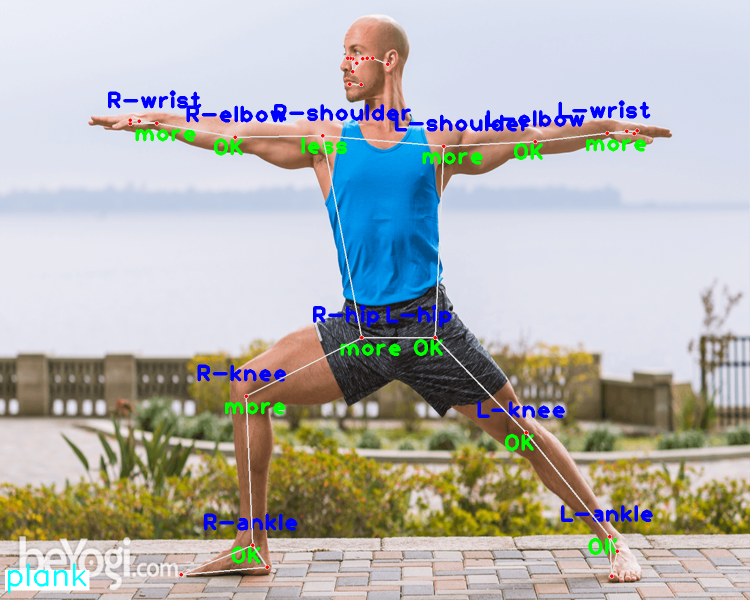

In [ ]:
image_path = '/content/drive/MyDrive/Detect-Yoga-Poses-And-Correction-In-Real-Time-Using-Machine-Learning-Algorithms/teacher_yoga/warrior2.png'  # Replace 'path_to_your_image.jpg' with the path to your input image

correct_feedback_image(model, image_path, input_csv)

Yoga Pose Correction for Video

In [ ]:

import cv2
import mediapipe as mp
import numpy as np
import time
import csv
import os

# Create a pose instance
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

from google.colab import drive
import cv2
import os

# Mount Google Drive
#drive.mount('/content/drive')

# Define output folder path
output_folder_path1 = '/content/drive/My Drive/CORRECTION-OUTPUT'

# Function to calculate angle between three points
def calculate_angle(landmark1, landmark2, landmark3, select = 1):
    angle = None
    if select == '1':
        x1, y1, _ = landmark1.x, landmark1.y, landmark1.z
        x2, y2, _ = landmark2.x, landmark2.y, landmark2.z
        x3, y3, _ = landmark3.x, landmark3.y, landmark3.z

        angle = np.degrees(np.arctan2(y3 - y2, x3 - x2) - np.arctan2(y1 - y2, x1 - x2))
    # else:
    #     x1, y1 = landmark1.x, landmark1.y
    #     x2, y2 = landmark2.x, landmark2.y
    #     x3, y3 = landmark3.x, landmark3.y

    #     radians = np.arctan2(y3 - y2, x3 - x2) - np.arctan2(y1 - y2, x1 - x2)
    #     angle = np.abs(np.degrees(radians))
    if angle is None:
      return 0

    angle_calc = angle + 360 if angle < 0 else angle
    return angle_calc

def correct_feedback(model, video='0', input_csv='0'):
    # Load video
    cap = cv2.VideoCapture(video)  # Replace with your video path
    output_folder_path2 = '/content/drive/My Drive/CORRECTION-OUTPUT'  # Define output folder path
    video_name1 = os.path.splitext(os.path.basename(video))[0]
    sc='/' # Extract video file name without extension
    video_folder_path2 = os.path.join(output_folder_path2, video_name1)
    if not os.path.exists(video_folder_path2):
        os.makedirs(video_folder_path2)
    img_dir3 = output_folder_path2+sc+video_name1


    if cap.isOpened() is False:
        print("Error opening video stream or file")

    accurate_angle_lists = []

    angle_name_list = ["L-wrist","R-wrist","L-elbow", "R-elbow","L-shoulder", "R-shoulder", "L-knee", "R-knee","L-ankle","R-ankle","L-hip", "R-hip"]
    angle_coordinates = [[13, 15, 19], [14, 16, 18], [11, 13, 15], [12, 14, 16], [13, 11, 23], [14, 12, 24], [23, 25, 27], [24, 26, 28],[23,27,31],[24,28,32],[24,23,25],[23,24,26]]
    correction_value = 30

    fps_time = 0
    k=0
    while cap.isOpened():
        ret_val, image = cap.read()
        # print(image.shape)

        if not ret_val:
            break

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resize_rgb = cv2.resize(image_rgb, (0, 0), None, .50, .50)

        results = pose.process(image_rgb)

        angles = []

        if results.pose_landmarks is not None:
            landmarks = results.pose_landmarks.landmark

            for itr in range(12):
                point_a = landmarks[angle_coordinates[itr][0]]
                point_b = landmarks[angle_coordinates[itr][1]]
                point_c = landmarks[angle_coordinates[itr][2]]

                angle_obtained = calculate_angle(point_a, point_b, point_c)

                angles.append(angle_obtained)

            y = model.predict([angles])

            Name_Yoga_Classification = str(y[0])

            probabilities = model.predict_proba([angles])

            class_labels = model.classes_
            check_accry_class = False

            for i,class_label in enumerate(class_labels):
                probability = probabilities[0, i]
                if probability > 0.5 :
                    check_accry_class = True
                else:
                    continue

            with open(input_csv, 'r') as inputCSV:
                for row in csv.reader(inputCSV):
                    if row[12] == Name_Yoga_Classification:
                        accurate_angle_lists = [float(row[0]), float(row[1]), float(row[2]), float(row[3]), float(row[4]), float(row[5]), float(row[6]), float(row[7]), float(row[8]), float(row[9]), float(row[10]), float(row[11])]

            if check_accry_class == True :
                (w, h), _ = cv2.getTextSize(Name_Yoga_Classification, cv2.FONT_HERSHEY_SIMPLEX, 1, 1)
                cv2.rectangle(image, (10, image.shape[0] - 30), (10 + w, image.shape[0] - 10), (255, 255, 255), cv2.FILLED)
                cv2.putText(image, Name_Yoga_Classification, (10, image.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3)

            else :
                (w, h), _ = cv2.getTextSize('None', cv2.FONT_HERSHEY_SIMPLEX, 1, 1)
                cv2.rectangle(image, (10, image.shape[0] - 30), (10 + w, image.shape[0] - 10), (255, 255, 255), cv2.FILLED)
                cv2.putText(image, 'None', (10, image.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3)


            correct_angle_count = 0
            for itr in range(12):
                point_a = landmarks[angle_coordinates[itr][0]]
                point_b = landmarks[angle_coordinates[itr][1]]
                point_c = landmarks[angle_coordinates[itr][2]]

                angle_obtained = calculate_angle(point_a, point_b, point_c, '1')

                if angle_obtained < accurate_angle_lists[itr] - correction_value:
                    status = "more"
                elif accurate_angle_lists[itr] + correction_value < angle_obtained:
                    status = "less"
                else:
                    status = "OK"
                    correct_angle_count += 1

                status_position = (int(point_b.x * image.shape[1]) - int(image.shape[1] * 0.03), int(point_b.y * image.shape[0]) + int(image.shape[0] * 0.03))
                cv2.putText(image, f"{status}", status_position, cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

                cv2.putText(image, f"{angle_name_list[itr]}", (int(point_b.x * image.shape[1]) - 50, int(point_b.y * image.shape[0]) - 10), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 2)

            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            posture = "CORRECT" if correct_angle_count > 9 else "WRONG"
            posture_color = (0, 255, 0) if posture == "CORRECT" else (0, 0, 255)

            posture_position = (10, 30)
            cv2.putText(image, f"Yoga movements: {posture}", posture_position, cv2.FONT_HERSHEY_PLAIN, 1.5, posture_color, 2)

            fps_text = f"FPS: {1.0 / (time.time() - fps_time):.3f}"
            fps_position = (10, 60)
            cv2.putText(image, fps_text, fps_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            #cv2_imshow(image)

            fps_time = time.time()

        if cv2.waitKey(1) == 27:
            break
        #for i, img in enumerate(image):
        # print(image.shape)

        if k > 0:
          i_formatted = '{:03d}'.format(k)
          img_name = f"output_image_{i_formatted}.jpg"
          img_path = os.path.join(video_folder_path2, img_name)
          cv2.imwrite(img_path, image)
        k=k+1
        print(k)
    cap.release()
    cv2.destroyAllWindows()
    video_folder_path2 = os.path.dirname(video_folder_path2)
    def compute_average_dimensions(video_folder_path2):
        total_width = 0
        total_height = 0
        img_count = 0
        print(video_folder_path2)

        for img_file in os.listdir(video_folder_path2):
            if img_file.endswith((".jpg", ".jpeg", ".png")):

               image = Image.open(os.path.join(video_folder_path2, img_file))
               w, h = image.size
               total_width += w
               total_height += h
               img_count += 1

        avg_width = int(total_width / img_count)
        avg_height = int(total_height / img_count)
        return avg_width, avg_height

    # Calculate average dimensions of images
    avg_width, avg_height = compute_average_dimensions(img_dir3)

    def create_video_from_images(folder, video_filename='video_name.mp4'):
        # Get list of image files in the folder

        valid_images = [i for i in os.listdir(folder) if i.endswith((".jpg", ".jpeg", ".png"))]

        # Sort images based on filename
        valid_images.sort()

        # Create list of image paths
        image_paths = [os.path.join(folder, img_name) for img_name in valid_images]

        # Create video from image sequence
        clip = ImageSequenceClip(image_paths, fps=12)  # Adjust fps as needed

        # Get the first frame
        first_frame = image_paths[0]

        # Duplicate the first frame to match the desired duration
        num_duplicates = max(1, int(clip.fps * (1 - len(image_paths) / clip.fps)))
        image_paths = [first_frame] * num_duplicates + image_paths

        # Create video from image sequence
        clip = ImageSequenceClip(image_paths, fps=12)  # Adjust fps as needed

        # Save the video
        video_path = os.path.join(folder, video_filename)
        clip.write_videofile(video_path, codec='libx264')

        # Print the name of each image appended in the video
        print("Names of images appended in the video:")
        for img_path in image_paths[num_duplicates:]:
            img_name = os.path.basename(img_path)
        return video_path
        # Replace 'img_dir' with the directory containing your images
    video_path = create_video_from_images(img_dir3)






In [ ]:
correct_feedback(model,'/content/drive/MyDrive/Detect-Yoga-Poses-And-Correction-In-Real-Time-Using-Machine-Learning-Algorithms/downdog_warrior03.mp4','/content/drive/MyDrive/Detect-Yoga-Poses-And-Correction-In-Real-Time-Using-Machine-Learning-Algorithms/teacher_yoga/angle_teacher_yoga.csv' )

  warnings.warn(

  warnings.warn(

  warnings.warn(

  warnings.warn(



1


  warnings.warn(

  warnings.warn(



2


  warnings.warn(

  warnings.warn(



3


  warnings.warn(

  warnings.warn(



4


  warnings.warn(

  warnings.warn(



5


  warnings.warn(

  warnings.warn(



6


  warnings.warn(

  warnings.warn(



7


  warnings.warn(

  warnings.warn(



8


  warnings.warn(

  warnings.warn(



9


  warnings.warn(

  warnings.warn(



10


  warnings.warn(

  warnings.warn(



11


  warnings.warn(

  warnings.warn(



12


  warnings.warn(

  warnings.warn(



13


  warnings.warn(

  warnings.warn(



14


  warnings.warn(

  warnings.warn(



15


  warnings.warn(

  warnings.warn(



16


  warnings.warn(

  warnings.warn(



17


  warnings.warn(

  warnings.warn(



18


  warnings.warn(

  warnings.warn(



19


  warnings.warn(

  warnings.warn(



20


  warnings.warn(

  warnings.warn(



21


  warnings.warn(

  warnings.warn(



22


  warnings.warn(

  warnings.warn(



23


  warnings.warn(

  warnings.warn(



24


  warnings.warn(

  warnings.warn(



25


  warnings.warn(

  warnings.warn(



26


  warnings.warn(

  warnings.warn(



27


  warnings.warn(

  warnings.warn(



28


  warnings.warn(

  warnings.warn(



29


  warnings.warn(

  warnings.warn(



30


  warnings.warn(

  warnings.warn(



31


  warnings.warn(

  warnings.warn(



32


  warnings.warn(

  warnings.warn(



33


  warnings.warn(

  warnings.warn(



34


  warnings.warn(

  warnings.warn(



35


  warnings.warn(

  warnings.warn(



36


  warnings.warn(

  warnings.warn(



37


  warnings.warn(

  warnings.warn(



38


  warnings.warn(

  warnings.warn(



39


  warnings.warn(

  warnings.warn(



40


  warnings.warn(

  warnings.warn(



41


  warnings.warn(

  warnings.warn(



42


  warnings.warn(

  warnings.warn(



43


  warnings.warn(

  warnings.warn(



44


  warnings.warn(

  warnings.warn(



45


  warnings.warn(

  warnings.warn(



46


  warnings.warn(

  warnings.warn(



47


  warnings.warn(

  warnings.warn(



48


  warnings.warn(

  warnings.warn(



49


  warnings.warn(

  warnings.warn(



50


  warnings.warn(

  warnings.warn(



51


  warnings.warn(

  warnings.warn(



52


  warnings.warn(

  warnings.warn(



53


  warnings.warn(

  warnings.warn(



54


  warnings.warn(

  warnings.warn(



55


  warnings.warn(

  warnings.warn(



56


  warnings.warn(

  warnings.warn(



57


  warnings.warn(

  warnings.warn(



58


  warnings.warn(

  warnings.warn(



59


  warnings.warn(

  warnings.warn(



60


  warnings.warn(

  warnings.warn(



61


  warnings.warn(

  warnings.warn(



62


  warnings.warn(

  warnings.warn(



63


  warnings.warn(

  warnings.warn(



64


  warnings.warn(

  warnings.warn(



65


  warnings.warn(

  warnings.warn(



66


  warnings.warn(

  warnings.warn(



67


  warnings.warn(

  warnings.warn(



68


  warnings.warn(

  warnings.warn(



69


  warnings.warn(

  warnings.warn(



70


  warnings.warn(

  warnings.warn(



71


  warnings.warn(

  warnings.warn(



72


  warnings.warn(

  warnings.warn(



73


  warnings.warn(

  warnings.warn(



74


  warnings.warn(

  warnings.warn(



75


  warnings.warn(

  warnings.warn(



76


  warnings.warn(

  warnings.warn(



77


  warnings.warn(

  warnings.warn(



78


  warnings.warn(

  warnings.warn(



79


  warnings.warn(

  warnings.warn(



80


  warnings.warn(

  warnings.warn(



81


  warnings.warn(

  warnings.warn(



82


  warnings.warn(

  warnings.warn(



83


  warnings.warn(

  warnings.warn(



84


  warnings.warn(

  warnings.warn(



85


  warnings.warn(

  warnings.warn(



86


  warnings.warn(

  warnings.warn(



87


  warnings.warn(

  warnings.warn(



88


  warnings.warn(

  warnings.warn(



89


  warnings.warn(

  warnings.warn(



90


  warnings.warn(

  warnings.warn(



91


  warnings.warn(

  warnings.warn(



92


  warnings.warn(

  warnings.warn(



93


  warnings.warn(

  warnings.warn(



94


  warnings.warn(

  warnings.warn(



95


  warnings.warn(

  warnings.warn(



96


  warnings.warn(

  warnings.warn(



97


  warnings.warn(

  warnings.warn(



98


  warnings.warn(

  warnings.warn(



99


  warnings.warn(

  warnings.warn(



100


  warnings.warn(

  warnings.warn(



101


  warnings.warn(

  warnings.warn(



102


  warnings.warn(

  warnings.warn(



103


  warnings.warn(

  warnings.warn(



104


  warnings.warn(

  warnings.warn(



105


  warnings.warn(

  warnings.warn(



106


  warnings.warn(

  warnings.warn(



107


  warnings.warn(

  warnings.warn(



108


  warnings.warn(

  warnings.warn(



109


  warnings.warn(

  warnings.warn(



110


  warnings.warn(

  warnings.warn(



111


  warnings.warn(

  warnings.warn(



112


  warnings.warn(

  warnings.warn(



113


  warnings.warn(

  warnings.warn(



114


  warnings.warn(

  warnings.warn(



115


  warnings.warn(

  warnings.warn(



116


  warnings.warn(

  warnings.warn(



117


  warnings.warn(

  warnings.warn(



118


  warnings.warn(

  warnings.warn(



119


  warnings.warn(

  warnings.warn(



120


  warnings.warn(

  warnings.warn(



121


  warnings.warn(

  warnings.warn(



122


  warnings.warn(

  warnings.warn(



123


  warnings.warn(

  warnings.warn(



124


  warnings.warn(

  warnings.warn(



125


  warnings.warn(

  warnings.warn(



126


  warnings.warn(

  warnings.warn(



127


  warnings.warn(

  warnings.warn(



128


  warnings.warn(

  warnings.warn(



129


  warnings.warn(

  warnings.warn(



130


  warnings.warn(

  warnings.warn(



131


  warnings.warn(

  warnings.warn(



132


  warnings.warn(

  warnings.warn(



133


  warnings.warn(

  warnings.warn(



134


  warnings.warn(

  warnings.warn(



135


  warnings.warn(

  warnings.warn(



136


  warnings.warn(

  warnings.warn(



137


  warnings.warn(

  warnings.warn(



138


  warnings.warn(

  warnings.warn(



139


  warnings.warn(

  warnings.warn(



140


  warnings.warn(

  warnings.warn(



141


  warnings.warn(

  warnings.warn(



142


  warnings.warn(

  warnings.warn(



143


  warnings.warn(

  warnings.warn(



144


  warnings.warn(

  warnings.warn(



145


  warnings.warn(

  warnings.warn(



146


  warnings.warn(

  warnings.warn(



147


  warnings.warn(

  warnings.warn(



148


  warnings.warn(

  warnings.warn(



149


  warnings.warn(

  warnings.warn(



150


  warnings.warn(

  warnings.warn(



151


  warnings.warn(

  warnings.warn(



152


  warnings.warn(

  warnings.warn(



153


  warnings.warn(

  warnings.warn(



154


  warnings.warn(

  warnings.warn(



155


  warnings.warn(

  warnings.warn(



156


  warnings.warn(

  warnings.warn(



157


  warnings.warn(

  warnings.warn(



158


  warnings.warn(

  warnings.warn(



159


  warnings.warn(

  warnings.warn(



160


  warnings.warn(

  warnings.warn(



161


  warnings.warn(

  warnings.warn(



162


  warnings.warn(

  warnings.warn(



163


  warnings.warn(

  warnings.warn(



164


  warnings.warn(

  warnings.warn(



165


  warnings.warn(

  warnings.warn(



166


  warnings.warn(

  warnings.warn(



167


  warnings.warn(

  warnings.warn(



168


  warnings.warn(

  warnings.warn(



169


  warnings.warn(

  warnings.warn(



170


  warnings.warn(

  warnings.warn(



171


  warnings.warn(

  warnings.warn(



172


  warnings.warn(

  warnings.warn(



173


  warnings.warn(

  warnings.warn(



174


  warnings.warn(

  warnings.warn(



175


  warnings.warn(

  warnings.warn(



176


  warnings.warn(

  warnings.warn(



177


  warnings.warn(

  warnings.warn(



178


  warnings.warn(

  warnings.warn(



179


  warnings.warn(

  warnings.warn(



180


  warnings.warn(

  warnings.warn(



181


  warnings.warn(

  warnings.warn(



182


  warnings.warn(

  warnings.warn(



183


  warnings.warn(

  warnings.warn(



184


  warnings.warn(

  warnings.warn(



185


  warnings.warn(

  warnings.warn(



186


  warnings.warn(

  warnings.warn(



187


  warnings.warn(

  warnings.warn(



188


  warnings.warn(

  warnings.warn(



189


  warnings.warn(

  warnings.warn(



190


  warnings.warn(

  warnings.warn(



191


  warnings.warn(

  warnings.warn(



192


  warnings.warn(

  warnings.warn(



193


  warnings.warn(

  warnings.warn(



194


  warnings.warn(

  warnings.warn(



195


  warnings.warn(

  warnings.warn(



196


  warnings.warn(

  warnings.warn(



197


  warnings.warn(

  warnings.warn(



198


  warnings.warn(

  warnings.warn(



199


  warnings.warn(

  warnings.warn(



200


  warnings.warn(

  warnings.warn(



201


  warnings.warn(

  warnings.warn(



202


  warnings.warn(

  warnings.warn(



203


  warnings.warn(

  warnings.warn(



204


  warnings.warn(

  warnings.warn(



205


  warnings.warn(

  warnings.warn(



206


  warnings.warn(

  warnings.warn(



207


  warnings.warn(

  warnings.warn(



208


  warnings.warn(

  warnings.warn(



209


  warnings.warn(

  warnings.warn(



210


  warnings.warn(

  warnings.warn(



211


  warnings.warn(

  warnings.warn(



212


  warnings.warn(

  warnings.warn(



213


  warnings.warn(

  warnings.warn(



214


  warnings.warn(

  warnings.warn(



215


  warnings.warn(

  warnings.warn(



216


  warnings.warn(

  warnings.warn(



217


  warnings.warn(

  warnings.warn(



218


  warnings.warn(

  warnings.warn(



219


  warnings.warn(

  warnings.warn(



220


  warnings.warn(

  warnings.warn(



221


  warnings.warn(

  warnings.warn(



222


  warnings.warn(

  warnings.warn(



223


  warnings.warn(

  warnings.warn(



224


  warnings.warn(

  warnings.warn(



225


  warnings.warn(

  warnings.warn(



226


  warnings.warn(

  warnings.warn(



227


  warnings.warn(

  warnings.warn(



228


  warnings.warn(

  warnings.warn(



229


  warnings.warn(

  warnings.warn(



230


  warnings.warn(

  warnings.warn(



231


  warnings.warn(

  warnings.warn(



232


  warnings.warn(

  warnings.warn(



233


  warnings.warn(

  warnings.warn(



234


  warnings.warn(

  warnings.warn(



235


  warnings.warn(

  warnings.warn(



236


  warnings.warn(

  warnings.warn(



237


  warnings.warn(

  warnings.warn(



238


  warnings.warn(

  warnings.warn(



239


  warnings.warn(

  warnings.warn(



240


  warnings.warn(

  warnings.warn(



241


  warnings.warn(

  warnings.warn(



242


  warnings.warn(

  warnings.warn(



243


  warnings.warn(

  warnings.warn(



244


  warnings.warn(

  warnings.warn(



245


  warnings.warn(

  warnings.warn(



246


  warnings.warn(

  warnings.warn(



247


  warnings.warn(

  warnings.warn(



248


  warnings.warn(

  warnings.warn(



249


  warnings.warn(

  warnings.warn(



250


  warnings.warn(

  warnings.warn(



251


  warnings.warn(

  warnings.warn(



252


  warnings.warn(

  warnings.warn(



253


  warnings.warn(

  warnings.warn(



254


  warnings.warn(

  warnings.warn(



255


  warnings.warn(

  warnings.warn(



256


  warnings.warn(

  warnings.warn(



257


  warnings.warn(

  warnings.warn(



258


  warnings.warn(

  warnings.warn(



259


  warnings.warn(

  warnings.warn(



260


  warnings.warn(

  warnings.warn(



261


  warnings.warn(

  warnings.warn(



262


  warnings.warn(

  warnings.warn(



263


  warnings.warn(

  warnings.warn(



264


  warnings.warn(

  warnings.warn(



265


  warnings.warn(

  warnings.warn(



266


  warnings.warn(

  warnings.warn(



267


  warnings.warn(

  warnings.warn(



268


  warnings.warn(

  warnings.warn(



269


  warnings.warn(

  warnings.warn(



270


  warnings.warn(

  warnings.warn(



271


  warnings.warn(

  warnings.warn(



272


  warnings.warn(

  warnings.warn(



273


  warnings.warn(

  warnings.warn(



274


  warnings.warn(

  warnings.warn(



275


  warnings.warn(

  warnings.warn(



276


  warnings.warn(

  warnings.warn(



277


  warnings.warn(

  warnings.warn(



278


  warnings.warn(

  warnings.warn(



279


  warnings.warn(

  warnings.warn(



280


  warnings.warn(

  warnings.warn(



281


  warnings.warn(

  warnings.warn(



282


  warnings.warn(

  warnings.warn(



283


  warnings.warn(

  warnings.warn(



284


  warnings.warn(

  warnings.warn(



285


  warnings.warn(

  warnings.warn(



286


  warnings.warn(

  warnings.warn(



287


  warnings.warn(

  warnings.warn(



288


  warnings.warn(

  warnings.warn(



289


  warnings.warn(

  warnings.warn(



290


  warnings.warn(

  warnings.warn(



291


  warnings.warn(

  warnings.warn(



292


  warnings.warn(

  warnings.warn(



293


  warnings.warn(

  warnings.warn(



294


  warnings.warn(

  warnings.warn(



295


  warnings.warn(

  warnings.warn(



296


  warnings.warn(

  warnings.warn(



297


  warnings.warn(

  warnings.warn(



298


  warnings.warn(

  warnings.warn(



299


  warnings.warn(

  warnings.warn(



300


  warnings.warn(

  warnings.warn(



301


  warnings.warn(

  warnings.warn(



302


  warnings.warn(

  warnings.warn(



303


  warnings.warn(

  warnings.warn(



304


  warnings.warn(

  warnings.warn(



305


  warnings.warn(

  warnings.warn(



306


  warnings.warn(

  warnings.warn(



307


  warnings.warn(

  warnings.warn(



308


  warnings.warn(

  warnings.warn(



309


  warnings.warn(

  warnings.warn(



310


  warnings.warn(

  warnings.warn(



311


  warnings.warn(

  warnings.warn(



312


  warnings.warn(

  warnings.warn(



313


  warnings.warn(

  warnings.warn(



314


  warnings.warn(

  warnings.warn(



315


  warnings.warn(

  warnings.warn(



316


  warnings.warn(

  warnings.warn(



317


  warnings.warn(

  warnings.warn(



318


  warnings.warn(

  warnings.warn(



319


  warnings.warn(

  warnings.warn(



320


  warnings.warn(

  warnings.warn(



321


  warnings.warn(

  warnings.warn(



322


  warnings.warn(

  warnings.warn(



323


  warnings.warn(

  warnings.warn(



324


  warnings.warn(

  warnings.warn(



325


  warnings.warn(

  warnings.warn(



326


  warnings.warn(

  warnings.warn(



327


  warnings.warn(

  warnings.warn(



328


  warnings.warn(

  warnings.warn(



329


  warnings.warn(

  warnings.warn(



330


  warnings.warn(

  warnings.warn(



331


  warnings.warn(

  warnings.warn(



332


  warnings.warn(

  warnings.warn(



333


  warnings.warn(

  warnings.warn(



334


  warnings.warn(

  warnings.warn(



335


  warnings.warn(

  warnings.warn(



336


  warnings.warn(

  warnings.warn(



337


  warnings.warn(

  warnings.warn(



338


  warnings.warn(

  warnings.warn(



339


  warnings.warn(

  warnings.warn(



340


  warnings.warn(

  warnings.warn(



341


  warnings.warn(

  warnings.warn(



342


  warnings.warn(

  warnings.warn(



343


  warnings.warn(

  warnings.warn(



344


  warnings.warn(

  warnings.warn(



345


  warnings.warn(

  warnings.warn(



346


  warnings.warn(

  warnings.warn(



347


  warnings.warn(

  warnings.warn(



348


  warnings.warn(

  warnings.warn(



349


  warnings.warn(

  warnings.warn(



350


  warnings.warn(

  warnings.warn(



351


  warnings.warn(

  warnings.warn(



352


  warnings.warn(

  warnings.warn(



353


  warnings.warn(

  warnings.warn(



354


  warnings.warn(

  warnings.warn(



355


  warnings.warn(

  warnings.warn(



356


  warnings.warn(

  warnings.warn(



357


  warnings.warn(

  warnings.warn(



358


  warnings.warn(

  warnings.warn(



359


  warnings.warn(

  warnings.warn(



360


  warnings.warn(

  warnings.warn(



361


  warnings.warn(

  warnings.warn(



362


  warnings.warn(

  warnings.warn(



363


  warnings.warn(

  warnings.warn(



364


  warnings.warn(

  warnings.warn(



365


  warnings.warn(

  warnings.warn(



366


  warnings.warn(

  warnings.warn(



367


  warnings.warn(

  warnings.warn(



368


  warnings.warn(

  warnings.warn(



369


  warnings.warn(

  warnings.warn(



370


  warnings.warn(

  warnings.warn(



371


  warnings.warn(

  warnings.warn(



372
373
/content/drive/My Drive/CORRECTION-OUTPUT/downdog_warrior03
Moviepy - Building video /content/drive/My Drive/CORRECTION-OUTPUT/downdog_warrior03/video_name.mp4.
Moviepy - Writing video /content/drive/My Drive/CORRECTION-OUTPUT/downdog_warrior03/video_name.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/CORRECTION-OUTPUT/downdog_warrior03/video_name.mp4
Names of images appended in the video:


In [ ]:
!pip install streamlit pyngrok opencv-python mediapipe moviepy --quiet


In [ ]:
# ✅ STEP: Write Streamlit App with Pose Detection + Correction
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
import mediapipe as mp
import os
import csv
import tempfile
import base64
from PIL import Image
from moviepy.editor import ImageSequenceClip
import pickle

# Load model
with open("/content/drive/MyDrive/model.pkl", "rb") as f:
    model = pickle.load(f)

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

# ---- Utility Functions ---- #
def calculate_angle(a, b, c):
    a = np.array([a.x, a.y])
    b = np.array([b.x, b.y])
    c = np.array([c.x, c.y])
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    if angle > 180.0:
        angle = 360 - angle
    return angle

def extract_pose_angles(results):
    angles = []
    lm = results.pose_landmarks.landmark
    pairs = [
        (mp_pose.PoseLandmark.LEFT_ELBOW, mp_pose.PoseLandmark.LEFT_WRIST, mp_pose.PoseLandmark.LEFT_INDEX),
        (mp_pose.PoseLandmark.RIGHT_ELBOW, mp_pose.PoseLandmark.RIGHT_WRIST, mp_pose.PoseLandmark.RIGHT_INDEX),
        (mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_ELBOW, mp_pose.PoseLandmark.LEFT_WRIST),
        (mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.PoseLandmark.RIGHT_ELBOW, mp_pose.PoseLandmark.RIGHT_WRIST),
        (mp_pose.PoseLandmark.LEFT_ELBOW, mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_HIP),
        (mp_pose.PoseLandmark.RIGHT_HIP, mp_pose.PoseLandmark.RIGHT_SHOULDER, mp_pose.PoseLandmark.RIGHT_ELBOW),
        (mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.LEFT_ANKLE),
        (mp_pose.PoseLandmark.RIGHT_HIP, mp_pose.PoseLandmark.RIGHT_KNEE, mp_pose.PoseLandmark.RIGHT_ANKLE),
        (mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.LEFT_ANKLE, mp_pose.PoseLandmark.LEFT_FOOT_INDEX),
        (mp_pose.PoseLandmark.RIGHT_HIP, mp_pose.PoseLandmark.RIGHT_ANKLE, mp_pose.PoseLandmark.RIGHT_FOOT_INDEX),
        (mp_pose.PoseLandmark.LEFT_KNEE, mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP),
        (mp_pose.PoseLandmark.LEFT_HIP, mp_pose.PoseLandmark.RIGHT_HIP, mp_pose.PoseLandmark.RIGHT_KNEE),
    ]
    for a, b, c in pairs:
        angles.append(calculate_angle(lm[a.value], lm[b.value], lm[c.value]))
    return angles

def get_angle_template(pose_name, csv_path):
    with open(csv_path, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            if row[12] == pose_name:
                return list(map(float, row[:12]))
    return [0]*12

def add_download_button(file_path, label):
    with open(file_path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode()
    href = f'<a href="data:file/output;base64,{b64}" download="{os.path.basename(file_path)}">{label} 📥</a>'
    st.markdown(href, unsafe_allow_html=True)

# ---- Pose Correction Image ---- #
def correct_image(image, csv_path):
    image_rgb = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    feedback_img = image_rgb.copy()

    if results.pose_landmarks:
        angles = extract_pose_angles(results)
        pred = model.predict([angles])[0]
        correct_angles = get_angle_template(pred, csv_path)
        mp_drawing.draw_landmarks(feedback_img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        for idx, (a_val, c_val) in enumerate(zip(angles, correct_angles)):
            status = "OK"
            if a_val < c_val - 30: status = "more"
            elif a_val > c_val + 30: status = "less"
            cv2.putText(feedback_img, f"{status}", (20, 50+idx*20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 1)

        return cv2.cvtColor(feedback_img, cv2.COLOR_RGB2BGR), pred
    return np.array(image), "No Pose"

# ---- Pose Correction Video ---- #
def correct_video(video_file, csv_path):
    tfile = tempfile.NamedTemporaryFile(delete=False)
    tfile.write(video_file.read())
    cap = cv2.VideoCapture(tfile.name)

    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret: break
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(img)
        annotated = frame.copy()
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(annotated, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            angles = extract_pose_angles(results)
            pred = model.predict([angles])[0]
            correct_angles = get_angle_template(pred, csv_path)
            for idx, (a_val, c_val) in enumerate(zip(angles, correct_angles)):
                status = "OK"
                if a_val < c_val - 30: status = "more"
                elif a_val > c_val + 30: status = "less"
                cv2.putText(annotated, f"{status}", (20, 50+idx*15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
        frames.append(annotated)

    cap.release()
    video_out = tempfile.NamedTemporaryFile(delete=False, suffix=".mp4").name
    clip = ImageSequenceClip([cv2.cvtColor(f, cv2.COLOR_BGR2RGB) for f in frames], fps=12)
    clip.write_videofile(video_out, codec='libx264')
    return video_out

# ---- Streamlit UI ---- #
st.title("🧘 Yoga Pose Detection & Correction")

option = st.sidebar.radio("Choose Function", ["Pose Detection", "Pose Correction"])
mode = st.selectbox("Input Type", ["Image", "Video"])

if option == "Pose Correction":
    csv_path = st.file_uploader("Upload Angle Template CSV", type=["csv"])
    if csv_path:
        if mode == "Image":
            img = st.file_uploader("Upload Image", type=["jpg", "jpeg", "png"])
            if img:
                image = Image.open(img)
                st.image(image, caption="Input Image", use_column_width=True)
                corrected, pose_name = correct_image(image, csv_path)
                st.image(corrected, caption=f"Corrected Pose: {pose_name}", use_column_width=True)
                temp_out = "/tmp/corrected_img.jpg"
                cv2.imwrite(temp_out, corrected)
                add_download_button(temp_out, "Download Corrected Image")
        else:
            vid = st.file_uploader("Upload Video", type=["mp4", "avi", "mov"])
            if vid:
                with st.spinner("Processing..."):
                    corrected_vid_path = correct_video(vid, csv_path)
                    st.video(corrected_vid_path)
                    add_download_button(corrected_vid_path, "Download Corrected Video")

else:
    if mode == "Image":
        img = st.file_uploader("Upload Image", type=["jpg", "jpeg", "png"])
        if img:
            image = Image.open(img)
            st.image(image, caption="Input Image", use_column_width=True)
            img_array = np.array(image)
            img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            results = pose.process(img_rgb)
            if results.pose_landmarks:
                angles = extract_pose_angles(results)
                pred = model.predict([angles])[0]
                mp_drawing.draw_landmarks(img_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
                cv2.putText(img_rgb, str(pred), (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
                result_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
                st.image(result_img, caption=f"Predicted Pose: {pred}", use_column_width=True)
                temp_out = "/tmp/pred_img.jpg"
                cv2.imwrite(temp_out, result_img)
                add_download_button(temp_out, "Download Annotated Image")
    else:
        vid = st.file_uploader("Upload Video", type=["mp4", "avi", "mov"])
        if vid:
            with st.spinner("Processing..."):
                corrected_vid_path = correct_video(vid, "/content/drive/MyDrive/your_angle_template.csv")
                st.video(corrected_vid_path)
                add_download_button(corrected_vid_path, "Download Annotated Video")


Overwriting app.py


In [ ]:
!rm -f /root/.ngrok2/ngrok.yml


In [ ]:
!ngrok config add-authtoken 30EyDsTpvI0ZvLicdveDvyrBod2_6R2BQQrji2GM7BTSDVDQb

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Start a new tunnel on port 8501
public_url = ngrok.connect(8501)
print("✅ Your Streamlit app is live at:", public_url)


✅ Your Streamlit app is live at: NgrokTunnel: "https://70671c2de30a.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!streamlit run app.py &> /dev/null &


END

In [ ]:


# import cv2
# import mediapipe as mp
# import numpy as np
# import csv
# import os

# # Create a pose instance
# mp_pose = mp.solutions.pose
# pose = mp_pose.Pose()

# def calculate_angle(landmark1, landmark2, landmark3, select=1):
#     angle=None
#     if select == '1':
#         x1, y1, _ = landmark1.x, landmark1.y, landmark1.z
#         x2, y2, _ = landmark2.x, landmark2.y, landmark2.z
#         x3, y3, _ = landmark3.x, landmark3.y, landmark3.z

#         angle = np.degrees(np.arctan2(y3 - y2, x3 - x2) - np.arctan2(y1 - y2, x1 - x2))
#     # else:
#     #     x1, y1 = landmark1.x, landmark1.y
#     #     x2, y2 = landmark2.x, landmark2.y
#     #     x3, y3 = landmark3.x, landmark3.y

#     #     radians = np.arctan2(y3 - y2, x3 - x2) - np.arctan2(y1 - y2, x1 - x2)
#     #     angle = np.abs(np.degrees(radians))
#     if angle is None:
#       return 0
#     angle_calc = angle + 360 if angle < 0 else angle
#     return angle_calc

# def correct_feedback_image(model, image_path, input_csv='0'):
#     angle_name_list = ["L-wrist","R-wrist","L-elbow", "R-elbow","L-shoulder", "R-shoulder", "L-knee", "R-knee","L-ankle","R-ankle","L-hip", "R-hip"]
#     angle_coordinates = [[13, 15, 19], [14, 16, 18], [11, 13, 15], [12, 14, 16], [13, 11, 23], [14, 12, 24], [23, 25, 27], [24, 26, 28],[23,27,31],[24,28,32],[24,23,25],[23,24,26]]
#     correction_value = 30
#     image = cv2.imread(image_path)

#     target_width=1500
#     target_height=1200
#     # Resize image to target dimensions
#     image = cv2.resize(image, (target_width, target_height))


#     #image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)  # Reduce image size by 50%
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     results = pose.process(image_rgb)

#     if results.pose_landmarks is not None:
#         landmarks = results.pose_landmarks.landmark
#         angles = []

#         for itr in range(12):
#             point_a = landmarks[angle_coordinates[itr][0]]
#             point_b = landmarks[angle_coordinates[itr][1]]
#             point_c = landmarks[angle_coordinates[itr][2]]

#             angle_obtained = calculate_angle(point_a, point_b, point_c)

#             angles.append(angle_obtained)

#         y = model.predict([angles])
#         Name_Yoga_Classification = str(y[0])

#         probabilities = model.predict_proba([angles])
#         class_labels = model.classes_
#         check_accry_class = False

#         for i, class_label in enumerate(class_labels):
#             probability = probabilities[0, i]
#             if probability > 0.5:
#                 check_accry_class = True
#             else:
#                 continue

#         with open(input_csv, 'r') as inputCSV:
#             for row in csv.reader(inputCSV):
#                 if row[12] == Name_Yoga_Classification:
#                     accurate_angle_lists = [float(row[0]), float(row[1]), float(row[2]), float(row[3]), float(row[4]), float(row[5]), float(row[6]), float(row[7]), float(row[8]), float(row[9]), float(row[10]), float(row[11])]

#         if check_accry_class:
#             (w, h), _ = cv2.getTextSize(Name_Yoga_Classification, cv2.FONT_HERSHEY_SIMPLEX, 2, 4)
#             cv2.rectangle(image, (10, image.shape[0] - 60), (10 + w, image.shape[0] - 20), (255, 255, 255), cv2.FILLED)
#             cv2.putText(image, Name_Yoga_Classification, (10, image.shape[0] - 30), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 0), 4)

#         else:
#             (w, h), _ = cv2.getTextSize('None', cv2.FONT_HERSHEY_SIMPLEX, 2, 4)
#             cv2.rectangle(image, (10, image.shape[0] - 60), (10 + w, image.shape[0] - 20), (255, 255, 255), cv2.FILLED)
#             cv2.putText(image, 'None', (10, image.shape[0] - 30), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 0), 4)

#         correct_angle_count = 0
#         for itr in range(12):
#             point_a = landmarks[angle_coordinates[itr][0]]
#             point_b = landmarks[angle_coordinates[itr][1]]
#             point_c = landmarks[angle_coordinates[itr][2]]

#             angle_obtained = calculate_angle(point_a, point_b, point_c, '1')

#             if angle_obtained < accurate_angle_lists[itr] - correction_value:
#                 status = "more"
#             elif accurate_angle_lists[itr] + correction_value < angle_obtained:
#                 status = "less"
#             else:
#                 status = "OK"
#                 correct_angle_count += 1

#             status_position = (int(point_b.x * image.shape[1]) - int(image.shape[1] * 0.03), int(point_b.y * image.shape[0]) + int(image.shape[0] * 0.03))
#             cv2.putText(image, f"{status}", status_position, cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), 6)
#             cv2.putText(image, f"{angle_name_list[itr]}", (int(point_b.x * image.shape[1]) - 100, int(point_b.y * image.shape[0]) - 30), cv2.FONT_HERSHEY_PLAIN, 3, (255, 0, 0), 6)

#         mp_drawing = mp.solutions.drawing_utils
#         annotated_image = image.copy()
#         mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

#         image1 = cv2.resize(annotated_image, (0, 0), fx=0.5, fy=0.5)
#         cv2_imshow(image1)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
#     else:
#         print("No pose landmarks found in the image.")




In [ ]:
# input_csv = '/content/drive/MyDrive/Detect-Yoga-Poses-And-Correction-In-Real-Time-Using-Machine-Learning-Algorithms/teacher_yoga/angle_teacher_yoga.csv'  # Replace 'path_to_your_csv_file.csv' with the path to your CSV file containing correction angles
# image_path = '/content/drive/MyDrive/Detect-Yoga-Poses-And-Correction-In-Real-Time-Using-Machine-Learning-Algorithms/teacher_yoga/warrior2.png'  # Replace 'path_to_your_image.jpg' with the path to your input image
# correct_feedback_image(model, image_path, input_csv)